In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
# %matplotlib inline
%matplotlib inline

import os
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
root = r'C:\Users\Aulamultimedia\MEGA\Especializacion en Inteligencia Artificial UBA\Materias\Bimestre 2\Vision por Computadora 1\vision_computadora_I\Material_TPs\TP5'

(243, 480)


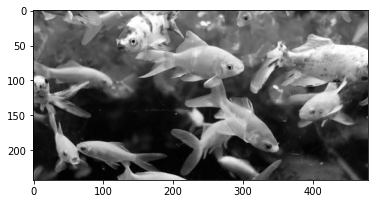

In [2]:
img = cv.imread(os.path.join(root,'peces.jpg'))
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
print(img.shape)

In [3]:
# Cambiamos el tamaño a un array de Mx1 (con M el número de píxels). Es decir, un vector de M componentes por canal gris
features = img.reshape((-1,))
print('Dimensión de la matriz de características (espacio de grises): {}'.format(features.shape))
features = np.float32(features)

Dimensión de la matriz de características (espacio de grises): (116640,)


In [4]:
# Armamos un vector de features con la intensidad de gris y la espacialidad X-Y
largo = img.shape[1]
alto = img.shape[0]
espX = np.arange(0, largo)
espX = np.repeat(espX, alto)

espY = np.arange(0, alto)
espY = np.repeat(espY,largo)
espY = espY.reshape((alto, largo)).T
espY = espY.reshape((-1,))

featuresDim = np.array([features,espY, espX], dtype = 'float32').T
print(featuresDim.shape)


(116640, 3)


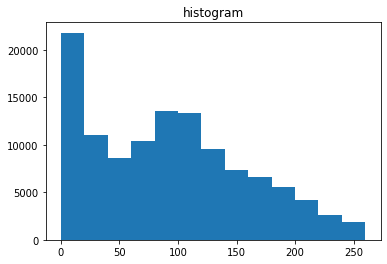

In [5]:
# Graficamos la distribución de características mediante histograma de escala de grises
plt.hist(features, bins =np.arange(0, 280, 20)) 
plt.title("histogram") 
plt.show()


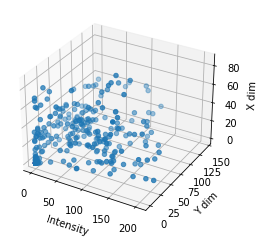

In [6]:
# Graficamos la distribución de características mediante histograma de escala de grises y espacial
featuresDim_hist, bins = np.histogramdd(featuresDim, bins = 20)
featuresDim_hist.shape
ax = plt.axes(projection='3d')
ax.scatter3D(featuresDim_hist[0],featuresDim_hist[1],featuresDim_hist[2],cmap='Greens')
ax.set_xlabel('Intensity')
ax.set_ylabel('Y dim')
ax.set_zlabel('X dim');
#plt.hist(featuresDim, bins =np.arange(0, 280, 20)) 
#plt.title("histogram") 
#plt.show()


In [7]:
# PUNTO 4:  UTILIZAMOS K-MEANS PARA DEFINIR CENTROIDES Y SEGMENTAR NUESTROS FEATURES

# Definimos el criterio de detención (Epsilon e iteraciones máximas) y número de clústers (K)
criteria = (cv.TERM_CRITERIA_MAX_ITER + cv.TERM_CRITERIA_EPS, 10, 1.0)
K = 4

# Corremos el algoritmo de K-means con:
# - El criterio de detención predefinido
# - 10 ejecuciones del algoritmo distintos parametros iniciales (devuelve los centros de la corrida que de grupos más compactos)
# - Parámetro de incialización de las semillas (aleatorio)
compact, label, color_clusters = cv.kmeans(features, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [8]:
# Mostramos los centroides (colores) que representan cada cluster encontrado
color_clusters = np.uint8(color_clusters)
print(f'Centroides: \n {color_clusters} \n')


Centroides: 
 [[136]
 [203]
 [ 84]
 [ 20]] 



(243, 480)


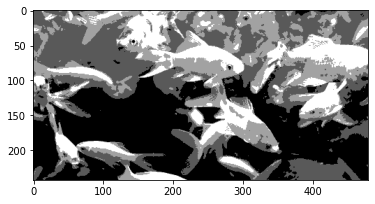

In [9]:
# Cada píxel que corresponde a un grupo tiene copiado como etiqueta el color al que corresponde. Hacemos un reshape al tamaño original de la matriz de imagen 
img_out = color_clusters[label.flatten()]
img_out = img_out.reshape((img.shape))

# Mostramos la imagen compuesta
plt.imshow(img_out, cmap='gray')
print(img.shape)

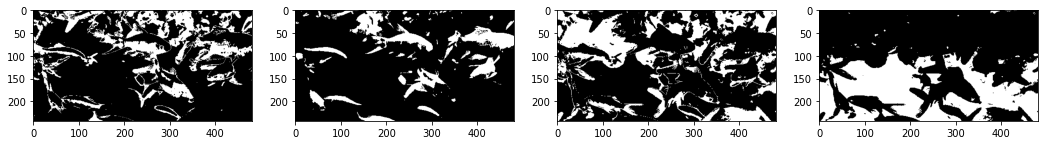

In [10]:
# Mostramos las máscaras de segmentación
mask_list = list()
for cluster in color_clusters:
    mask = np.zeros(img_out.shape,'uint8')
    mask[np.where(img_out == cluster)] = 255
    mask_list.append(mask)

fig, axs = plt.subplots(1, 4, figsize=(18, 6))
axs[0].imshow(mask_list[0], cmap='gray')
axs[1].imshow(mask_list[1], cmap='gray')
axs[2].imshow(mask_list[2], cmap='gray')
axs[3].imshow(mask_list[3], cmap='gray')




In [53]:
#UTILIZAMOS EL MISMO MÉTODO PERO PARA LAS FEATURES DIMENSIONALES
 
# Ante todo normalizamos todos los features entre 0 y 1
featuresDim[:,0] = featuresDim[:,0] / np.amax(featuresDim[:,0])
featuresDim[:,1] = featuresDim[:,1] / np.amax(featuresDim[:,1])
featuresDim[:,2] = featuresDim[:,2] / np.amax(featuresDim[:,2])

# Definimos el criterio de detención (Epsilon e iteraciones máximas) y número de clústers (K)
criteria = (cv.TERM_CRITERIA_MAX_ITER + cv.TERM_CRITERIA_EPS, 10, 1)
K = 4

# Corremos el algoritmo de K-means con:
# - El criterio de detención predefinido
# - 10 ejecuciones del algoritmo distintos parametros iniciales (devuelve los centros de la corrida que de grupos más compactos)
# - Parámetro de incialización de las semillas (aleatorio)
compact2, label2, color_clusters2 = cv.kmeans(np.float32(featuresDim), K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [54]:
# Mostramos los centroides (colores) que representan cada cluster encontrado
color_clusters2 = np.uint8(color_clusters2[:,0] * 255)
print(f'Centroides: \n {color_clusters2} \n')
label2.shape


Centroides: 
 [151  36 122 132] 



(116640, 1)

(243, 480)


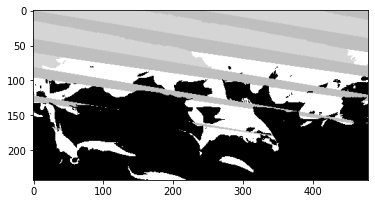

In [58]:
# Cada píxel que corresponde a un grupo tiene copiado como etiqueta el color al que corresponde. Hacemos un reshape al tamaño original de la matriz de imagen 
img_out2 = color_clusters2[label2.flatten()]
img_out2 = img_out2.reshape((img.shape))

# Mostramos la imagen compuesta
plt.imshow(img_out2, cmap='gray')
print(img.shape)

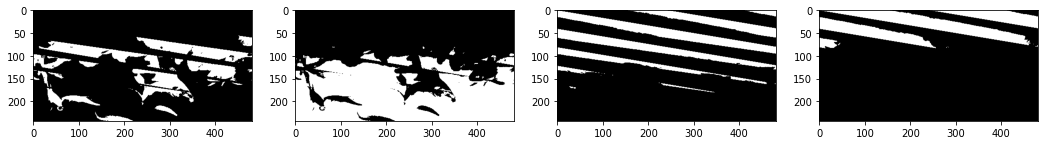

In [60]:
# Mostramos las máscaras de segmentación
mask_list = list()
for cluster in color_clusters2:
    mask = np.zeros(img_out2.shape,'uint8')
    mask[np.where(img_out2 == cluster)] = 255
    mask_list.append(mask)

fig, axs = plt.subplots(1, 4, figsize=(18, 6))
axs[0].imshow(mask_list[0], cmap='gray')
axs[1].imshow(mask_list[1], cmap='gray')
axs[2].imshow(mask_list[2], cmap='gray')
axs[3].imshow(mask_list[3], cmap='gray')

In [ ]:
# Conclusiones: 
# - La clusterización con el método kmeans utilizando únicamente intensidad de color ofrece resultados aceptables para diferenciar
# peces del fondo. Sin embargo, el elemento a identificar (peces) está compuesto de mas de una intensidad en partes como los ojos
# por ejemplo. Esta característica dificulta la clusterización mediante este método.
# - Con el aporte de los vectores X e Y tal vez lográbamos acercarnos a la solución porque las partes de los peces que tienen 
# distinta intensidad están cerca entre sí, pero finalmente observamos un efecto no deseado de rayas en las partes de intensidades
# similares, posiblemente como efecto de considerar el peso de la proximidad de píxeles.